In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read in the monthly data

In [14]:
monthly  = pd.read_csv('monthly_sales.csv')

In [15]:
# cleaned date column to help with analysis later

In [16]:
dates = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
         'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 10}
def fix_date(row):
    date = row.split('-')
    year = date[1]
    month = date[0]
    return (month,year)

In [17]:
monthly['Month, Year'] = monthly['Month, Year'].apply(fix_date)

In [18]:
monthly['Month'] = monthly['Month, Year'].apply(lambda x: x[0])
monthly['Year'] = monthly['Month, Year'].apply(lambda x: x[1])

In [35]:
def combine_items(df):
    dt = {}
    regions = ['NE', 'NW', 'SW', 'SE', 'C']
    col = list(df.columns)
    for i in regions:
        cols = [j for j in col if '-' + i in j]
        dt[i] = df[cols].sum(axis=1)
    
    new = pd.DataFrame(dt)
    new['Month, Year'] = monthly['Month, Year']
    new['Year'] = monthly['Year']
    new['Month'] = monthly['Month']
    new = new.rename(columns={'NE':'North East','NW':'North West','SW':'South West','SE':'South East','C':'Central'})
    return new
    
total_regions = combine_items(monthly)
total_regions.to_csv(r'total_regions.csv')

In [20]:
# look at difference in sales drop --> percent decrease
ib_release = ('Oct', '16') # Impossible Burger release date
avg_df = total_regions.loc[:,['North West', 'South West', 'Central', 'North East', 'South East']].apply(np.mean)

# find row when IB (Impossible Burger) was releases
ib_row = total_regions[total_regions['Month, Year'] == ib_release].loc[:,['North West', 'South West', 'Central', 'North East', 'South East']]
ib = ib_row.values
avg = avg_df.values
dec = avg - ib
percent_dec = (dec / avg) * 100
perc_dec_df = pd.DataFrame(percent_dec, columns = ['North West', 'South West', 'Central', 'North East', 'South East'])
perc_dec_df = perc_dec_df.rename(index={0:'Sales Decrease (%)'})
perc_dec_df

North West  South West    Central  North East  South East
Sales Decrease (%)    9.117537    9.013108  10.068483   10.419424    9.589828

In [21]:
# save data
perc_dec_df.to_csv(r'percent_decrease.csv')

In [24]:
total_regions.plot(kind='line',x='Month', y=['North West',
 'South West',
 'Central',
 'North East',
 'South East'])
x_vert = total_regions[total_regions['Month, Year'] == ('Oct', '18')].index[0]

plt.axvline(x=x_vert, color='black', linestyle= 'dotted', label='Impossible Burger\nIntroduced')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales by Region\nJanuary 2016 - September 2019') # add better title & subtitle
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.savefig('monthly_sales_by_region.png')
plt.show();

In [25]:
# Notes: visually, we can see each region drop, and stay at a lower value

In [26]:
# how were sales affected after the release?

In [27]:
ib_release = ('Oct', '18') # Impossible Burger release date

# find row when IB (Impossible Burger) was releases
ib_row = total_regions[total_regions['Month, Year'] == ib_release].loc[:,['North East', 'North West', 'South West', 'South East', 'Central']]

# rows before IB release
prev_ib = pd.DataFrame(total_regions.iloc[ib_row.index[0] - 1]).transpose().loc[:,['North East', 'North West', 'South West', 'South East', 'Central']]

# all rows after IB release (+ 1 makes it November 2018)
post_ib = total_regions.loc[ib_row.index[0] + 1:,['North East', 'North West', 'South West', 'South East', 'Central']]

In [28]:
# September 2018 sales
prev_ib

North East North West South West South East  Central
32    2720638    2670893    2710087    2586340  2559311

In [31]:
# November 2018 and onward average sales (by region)
post_average = pd.DataFrame(post_ib.mean()).transpose()
post_average

North East    North West    South West    South East       Central
0  2.496988e+06  2.412324e+06  2.449574e+06  2.370421e+06  2.358796e+06

In [32]:
# Overall Sales drop (by region) comparing: September 2018 to the average sales after October 2018

In [33]:
sales_drop = pd.DataFrame(prev_ib.values - post_average.values, columns=['North East', 'North West', 'South West', 'South East','Central'])
sales_drop = sales_drop.rename(index={0:'Sales Decrease (item count)'})
sales_drop

North East North West South West South East  \
Sales Decrease (item count)     223650     258569     260513     215919   

                            Central  
Sales Decrease (item count)  200515

In [34]:
# save data
sales_drop.to_csv(r'sales_drop_by_region.csv')

In [36]:
# Looking at each region sepataly: 

In [37]:
def select_region(df, region, other_cols=[]):
    cols = list(df.columns)
    
    region_cols = [i for i in cols if '-' + region in i]
    new = df[other_cols + region_cols] 
    new = new.rename(columns={'HM-{}'.format(region): 'Hamburger', 
                              'CF-{}'.format(region): 'Chicken Fillet', 
                              'FF-{}'.format(region): 'Fish Fillet'})
    return new

In [38]:
NE = select_region(monthly, 'NE', ['Month, Year', 'Year', 'Month'])
NE.to_csv(r'NE_regional.csv')

NW = select_region(monthly, 'NW',  ['Month, Year', 'Year', 'Month'])
NW.to_csv(r'NW_regional.csv')

SE = select_region(monthly, 'SE',  ['Month, Year', 'Year', 'Month'])
SE.to_csv(r'SE_regional.csv')

SW = select_region(monthly, 'SW',  ['Month, Year', 'Year', 'Month'])
SW.to_csv(r'SW_regional.csv')

C = select_region(monthly, 'C', ['Month, Year', 'Year', 'Month'])
C.to_csv(r'C_regional.csv')

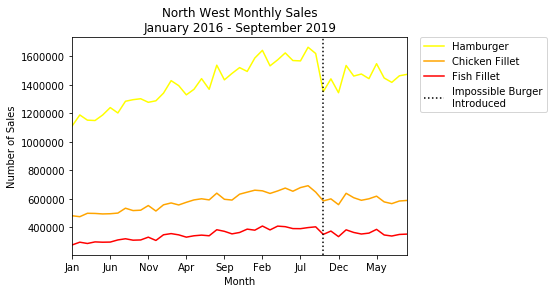

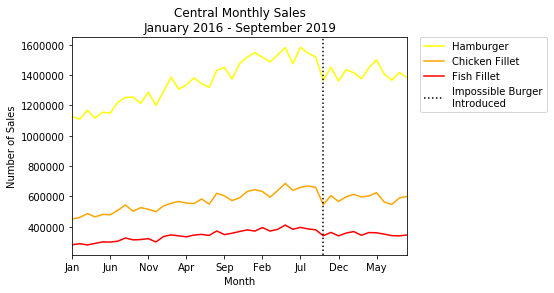

In [535]:
region_list = [NE, NW, SE, SW, C]
region_name = ['North East', 'North West', 'South East', 'South West', 'Central']
menu_list = ['Hamburger','Chicken Fillet','Fish Fillet']
for r in range(len(region_list)):
    curr = region_list[r]
    curr_cols = cols[region_name[r]]
    
    region_list[r].plot(kind='line',x='Month', y=menu_list[0], color='yellow',linestyle='-', label='Hamburger')
    plt.plot(curr[menu_list[1]], color='orange', linestyle='-',label='Chicken Fillet')
    plt.plot(curr[menu_list[2]], color='red', linestyle='-',label='Fish Fillet')

    x_vert = curr[curr['Month, Year'] == ('Oct', '18')].index[0]
    plt.axvline(x=x_vert, color='black', linestyle= 'dotted', label='Impossible Burger\nIntroduced')
    plt.legend(['Hamburger', 'Chicken Fillet', 'Fish Fillet'])
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
    
    plt.ylabel('Number of Sales')
    plt.title('{} Monthly Sales\nJanuary 2016 - September 2019'.format(region_name[r])) # add better title & subtitle
    
    plt.show();

In [536]:
# calculation of totals (i.e. not by region)

In [39]:
def combine_regions(df):
    dt = {}
    item = ['HM', 'CF', 'FF']
    col = list(df.columns)
    for i in item:
        cols = [j for j in col if i in j]
        dt[i] = df[cols].sum(axis=1)
    
    new = pd.DataFrame(dt)
    new['Month, Year'] = monthly['Month, Year']
    new['Year'] = monthly['Year']
    new['Month'] = monthly['Month']
    return new
        
total_monthly = combine_regions(monthly)
total_monthly.head()

HM       CF       FF Month, Year Year Month
0  5598648  2352671  1399660   (Jan, 16)   16   Jan
1  5840210  2394392  1448157   (Feb, 16)   16   Feb
2  5909899  2461847  1453511   (Mar, 16)   16   Mar
3  5799715  2455722  1461148   (Apr, 16)   16   Apr
4  6080407  2533501  1507504   (May, 16)   16   May

In [40]:
# save totals
total_monthly.to_csv(r'total_monthly.csv')


In [42]:
total_monthly.plot(kind='line',x='Month', y='HM', color='yellow',linestyle='-', label='Hamburger')
plt.plot(total_monthly['CF'], color='orange', linestyle='-',label='Chicken Fillet')
plt.plot(total_monthly['FF'], color='r', linestyle='-',label='Fish Fillet')

x_vert = total_monthly[total_monthly['Month, Year'] == ('Oct', '18')].index[0]
plt.axvline(x=x_vert, color='black', linestyle= 'dotted', label='Impossible Burger\nIntroduced')
plt.legend(['Hamburger', 'Chicken Fillet', 'Fish Fillet'])
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.ylabel('Number of Sales')
plt.title('Monthly Sales\nJanuary 2016 - September 2019') # add better title & subtitle

plt.show();

In [43]:
# resued from above: reminder

In [44]:
ib_release = ('Oct', '18') # Impossible Burger release date

# find row when IB (Impossible Burger) was releases
ib_row = total_monthly[total_monthly['Month, Year'] == ib_release].loc[:,['HM', 'CF', 'FF']]

# rows before IB release
prev_ib = pd.DataFrame(total_monthly.iloc[ib_row.index[0] - 1]).transpose().loc[:,['HM', 'CF', 'FF']]

# all rows after IB release (+ 1 makes it November 2018)
post_ib = total_monthly.loc[ib_row.index[0] + 1:,['HM', 'CF', 'FF']]

In [45]:
# November 2018 and onward average sales by item
post_average = pd.DataFrame(post_ib.mean()).transpose()
post_average

HM            CF            FF
0  7.261848e+06  3.014709e+06  1.811545e+06

In [46]:
# Overall Sales drop (by item) comparing: September 2018 to the average sales after October 2018
sales_drop = pd.DataFrame(prev_ib.values - post_average.values, columns=['HM', 'CF', 'FF'])
sales_drop = sales_drop.rename(index={0:'Sales Decrease (item count)'}, columns={'HM':'Hamburger','CF':'Chicken Fillet','FF':'Fish Fillet'})
sales_drop

Hamburger Chicken Fillet Fish Fillet
Sales Decrease (item count)    661073         312521      185573

In [62]:
total_monthly.head()

HM       CF       FF Month, Year Year Month
0  5598648  2352671  1399660   (Jan, 16)   16   Jan
1  5840210  2394392  1448157   (Feb, 16)   16   Feb
2  5909899  2461847  1453511   (Mar, 16)   16   Mar
3  5799715  2455722  1461148   (Apr, 16)   16   Apr
4  6080407  2533501  1507504   (May, 16)   16   May

In [64]:
# look at difference in sales drop --> percent decrease
ib_release = ('Oct', '16') # Impossible Burger release date
avg_df = total_monthly.loc[:,['HM','CF','FF']].apply(np.mean)

# find row when IB (Impossible Burger) was releases
ib_row = total_monthly[total_monthly['Month, Year'] == ib_release].loc[:,['HM','CF','FF']]
ib = ib_row.values
avg = avg_df.values
dec = avg - ib
percent_dec = (dec / avg) * 100
perc_dec_df = pd.DataFrame(percent_dec, columns = ['Hamburger','Chicken Fillet','Fish Fillet'])
perc_dec_df = perc_dec_df.rename(index={0:'Sales Decrease (%)'})
perc_dec_df

Hamburger  Chicken Fillet  Fish Fillet
Sales Decrease (%)  10.020929        9.291376     8.713925

In [47]:
# save
sales_drop.to_csv(r'sales_drop_by_item.csv')


In [614]:
# look at daily data for trend analysis

In [60]:
daily = pd.read_csv('daily_sales.csv')
daily

Unnamed: 0        Day  HM-NE  CF-NE  FF-NE  HM-SW  CF-SW  FF-SW  HM-NW  \
0      Friday   1/1/2016  37240  16077   8446  39249  16565  10204  37271   
1    Saturday   1/2/2016  36258  14726   7950  38106  14003   7316  35021   
2      Sunday   1/3/2016  37007  15103   8397  35494  15987   8683  35369   
3      Monday   1/4/2016  37590  16413   9537  33666  15114   8429  37993   
4     Tuesday   1/5/2016  38036  16199  10123  33528  13721  10085  37854   
5   Wednesday   1/6/2016  38187  16386   8410  33608  14322   9652  36343   
6    Thursday   1/7/2016  38095  16045  11791  33007  15068   8985  35901   
7      Friday   1/8/2016  34685  15058   8179  38964  13608  10985  36279   
8    Saturday   1/9/2016  35059  14585   7193  33637  14035   7616  38059   
9      Sunday  1/10/2016  36906  16905  10580  39361  14788   7105  35332   
10     Monday  1/11/2016  36893  16771  10091  35750  16565   9506  37802   
11    Tuesday  1/12/2016  37243  15642   9247  35040  16132   8424  36105   
12  Wednesday  1/13/2016  37476  15343  10250  35242  14846   9316  38015   
13   Thursday  1/14/2016  37977  16256  12264  36682  14869   8832  36866   
14     Friday  1/15/2016  36130  16352   7127  38272  15946  10360  35068   
15   Saturday  1/16/2016  35147  15408   7174  36955  15204   8140  34234   
16     Sunday  1/17/2016  38330  16272   9313  36046  16032   7152  35821   
17     Monday  1/18/2016  35629  15691   8441  37242  16313   9602  36945   
18    Tuesday  1/19/2016  38094  15224   9101  35703  16032   8425  33663   
19  Wednesday  1/20/2016  34610  17072   8739  38221  14952   9944  35313   
20   Thursday  1/21/2016  35293  16677  11108  38971  14999   9787  34489   
21     Friday  1/22/2016  35862  16553   6865  37796  16330  11615  37919   
22   Saturday  1/23/2016  38019  14905   7271  35544  14326   9015  33703   
23     Sunday  1/24/2016  38460  15743   9887  36372  15520   7722  33234   
24     Monday  1/25/2016  37295  16769   9068  33006  16468   9428  36311   
25    Tuesday  1/26/2016  35164  17046   9835  38405  13150   8632  37012   
26  Wednesday  1/27/2016  36414  16974  10656  38709  16688   9102  35904   
27   Thursday  1/28/2016  35179  16900  12027  35194  12996   9959  34396   
28     Friday  1/29/2016  38474  14468   7554  34861  16469  10941  34071   
29   Saturday  1/30/2016  37323  15347   7413  35504  13307   7877  35644   
30     Sunday  1/31/2016  36880  15892  11201  36430  14213   8302  33681   

    CF-NW  FF-NW  HM-SE  CF-SE  FF-SE   HM-C   CF-C   FF-C  
0   16819   9924  35967  13955  11734  35689  13499  11232  
1   14705   9028  36398  15089   8005  37178  14256   9152  
2   16591   8105  34864  13919   7011  35855  15557   8406  
3   14535   8034  36601  14528   8201  36168  15699   7940  
4   14590   9879  36661  15132   8874  36837  15420   8607  
5   16302   9360  34374  14696   9674  37790  13810  10228  
6   15408   8834  35895  14981   8370  36061  13436   8993  
7   14465  10639  35441  13411  11630  34898  15544  12463  
8   13804   8589  36194  15525   6890  37192  13619   6799  
9   15809   7702  33847  15282   7520  35334  14447   7583  
10  15222   8566  34769  15528   9312  37905  14909   9037  
11  16518   8555  35134  14510   7735  35045  14419   8418  
12  16162   9872  37190  15693   8416  34532  15537   9279  
13  15822   8617  34698  13358   8826  36526  14421   7804  
14  16561  10503  35856  15537  11533  37012  13057  11764  
15  15179   8543  36609  15241   8346  36274  15202   9431  
16  14858   7177  33645  15273   7647  36386  15493   7112  
17  14479   9107  34210  13589   8793  36938  14565   9250  
18  13625   8765  34634  15295   8436  36811  13162   7773  
19  14239   9474  34044  13408   8426  35951  15017   8276  
20  16771   9876  34814  15293   8637  37177  13464   9376  
21  14578  10598  34969  15744  11709  37222  15335  12847  
22  15514   8058  36681  13458   8189  35494  15609   8713  
23  14814   7680  35579  14646   7167  36777  13787   6881  
24  17134   8

In [53]:
daily['Day'] = daily['Day'].apply(pd.to_datetime)
daily = daily.rename(columns={'Unnamed: 0': 'Day of Week'})

In [56]:
day_val = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6, 'Sunday':7}

def region_daily(df, region):
    if type(region) == list:
        # select all values in list as region
        new = df.groupby('Day of Week').apply(np.sum).drop(columns=['Day of Week'])
        new['Day Value'] = new.index.map(day_val)
        new = new.sort_values('Day Value') 
        
    else:
        
        new = select_region(df, region, ['Day of Week']).groupby('Day of Week').apply(np.sum).drop(columns=['Day of Week'])
        new['Day Value'] = new.index.map(day_val)
        new = new.sort_values('Day Value') 
    return new

NW_day = region_daily(daily, 'NW')
NE_day = region_daily(daily, 'NE')
SW_day = region_daily(daily, 'SW')
SE_day = region_daily(daily, 'SE')
C_day = region_daily(daily, 'C')

In [57]:
total_day = region_daily(daily,['NW', 'SW','C','NE','SE'])

In [59]:
total_day.to_csv(r'total_day.csv')

In [51]:
# save 
NW_day.to_csv(r'NW_day.csv')
NW_day.to_csv(r'NW_day.csv')
NW_day.to_csv(r'NW_day.csv')
NW_day.to_csv(r'NW_day.csv')
NW_day.to_csv(r'NW_day.csv')

Hamburger  Chicken Fillet  Fish Fillet  Day Value
Day of Week                                                   
Monday          148711           59535        35454          1
Tuesday         146158           56659        33992          2
Wednesday       144518           58232        35968          3
Thursday        145288           56492        36373          4
Friday          179930           71480        60683          5
Saturday        182752           73896        41727          6
Sunday          179119           74664        37422          7

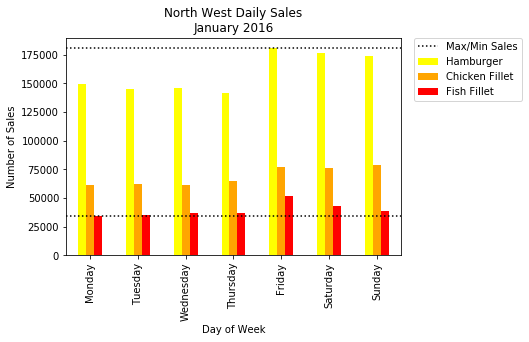

In [637]:
dfs = [NW_day, NE_day, SW_day, SE_day, C_day]
region_name = ['North West', 'North East', 'South West', 'South East', 'Central']

for i in range(len(dfs)):
    temp = dfs[i].drop(columns='Day Value')
    temp.plot(kind='bar', color = ['yellow', 'orange','r'])
    
    y_hor_max = np.max(np.max((temp)))
    y_hor_min = np.min(np.min((temp)))
    plt.axhline(y=y_hor_max, color='black', linestyle= 'dotted', label='Max/Min Sales')
    plt.axhline(y=y_hor_min, color='black', linestyle= 'dotted')

    
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.title('{} Daily Sales\nJanuary 2016'.format(region_name[i])) # add better title & subtitle
    plt.ylabel('Number of Sales')

    plt.show;